In [27]:
#Dataset link
#https://drive.google.com/file/d/1cCkwiVv4mgfl20ntgY3n4yApcWqqZQe6/view

Import Libraries

In [28]:
# pip install scikit-learn

In [ ]:
# pip install difflib

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Importing Dataset

In [30]:
movies_data = pd.read_csv('updated_movie.csv')
movies_data.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,631842,Knock at the Cabin,Horror-Mystery-Thriller,en,While vacationing at a remote cabin a young gi...,3422.537,Blinding Edge Pictures-Universal Pictures-Film...,2023-02-01,20000000.0,52000000.0,100.0,Released,Save your family or save humanity. Make the ch...,6.457,888.0,Dave Bautista-Jonathan Groff-Ben Aldridge-Kris...,based on novel or book-sacrifice-cabin-faith-e...,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,/zWDMQX0sPaW2u0N2pJaYA8bVVaJ.jpg,1058949-646389-772515-505642-143970-667216-104...
1,646389,Plane,Action-Adventure-Thriller,en,After a heroic job of successfully landing his...,2618.646,MadRiver Pictures-Di Bonaventura Pictures-G-BA...,2023-01-12,25000000.0,51000000.0,107.0,Released,Survive together or die alone.,6.901,785.0,Gerard Butler-Mike Colter-Yoson An-Tony Goldwy...,pilot-airplane-philippines-held hostage-plane ...,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,/9Rq14Eyrf7Tu1xk0Pl7VcNbNh1n.jpg,505642-758769-864692-631842-1058949-925943-758...
2,505642,Black Panther: Wakanda Forever,Action-Adventure-Science Fiction,en,Queen Ramonda Shuri M’Baku Okoye and the Dora ...,2525.408,Marvel Studios,2022-11-09,250000000.0,858535561.0,162.0,Released,Forever.,7.338,3922.0,Letitia Wright-Lupita Nyong'o-Danai Gurira-Win...,loss of loved one-hero-sequel-superhero-based ...,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,/xDMIl84Qo5Tsu62c9DGWhmPI67A.jpg,436270-829280-76600-56969-312634-1037858-238-5...
3,956101,The Eighth Clause,Thriller,la,Kat and Borja appear to be a perfect couple bu...,2259.303,SDB Films-El Hombre Orquesta,2022-04-29,0.0,0.0,0.0,Released,NaN,4.600,10.0,Maite Perroni-Manuel Vega-Óscar Jaenada-Jessic...,NaN,/8tc8eMFAX2SDC1TRu987qFQy8Cl.jpg,/kLnqNE9Af5QHyvUxw8cDGhF1ilv.jpg,NaN
4,603692,John Wick: Chapter 4,Action-Thriller-Crime,en,With the price on his head ever increasing Joh...,2252.114,Thunder Road-87Eleven-Lionsgate-Summit Enterta...,2023-03-22,90000000.0,0.0,169.0,Released,No way back. One way out.,8.319,202.0,Keanu Reeves-Donnie Yen-Bill Skarsgård-Ian McS...,new york city-martial arts-hitman-sequel-organ...,/vZloFAK7NmvMGKE7VkF5UHaz0I.jpg,/i8dshLvq4LE3s0v8PrkDdUyb1ae.jpg,677179-804095


In [31]:
movies_data.shape

(722986, 20)

In [ ]:
df = pd.DataFrame(movies_data)

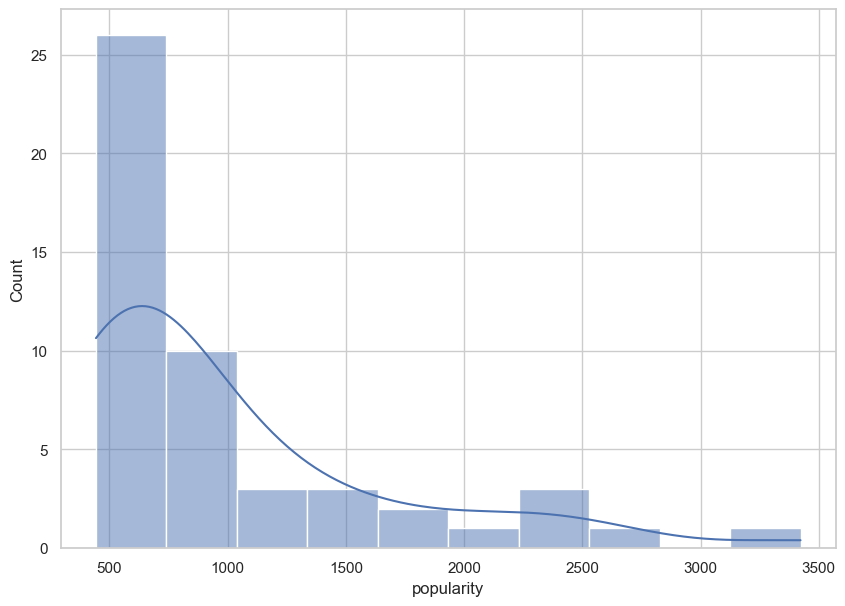

In [35]:
from matplotlib import pyplot as plt
sns.histplot(df['popularity'][:50],kde = True)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\3734754524.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


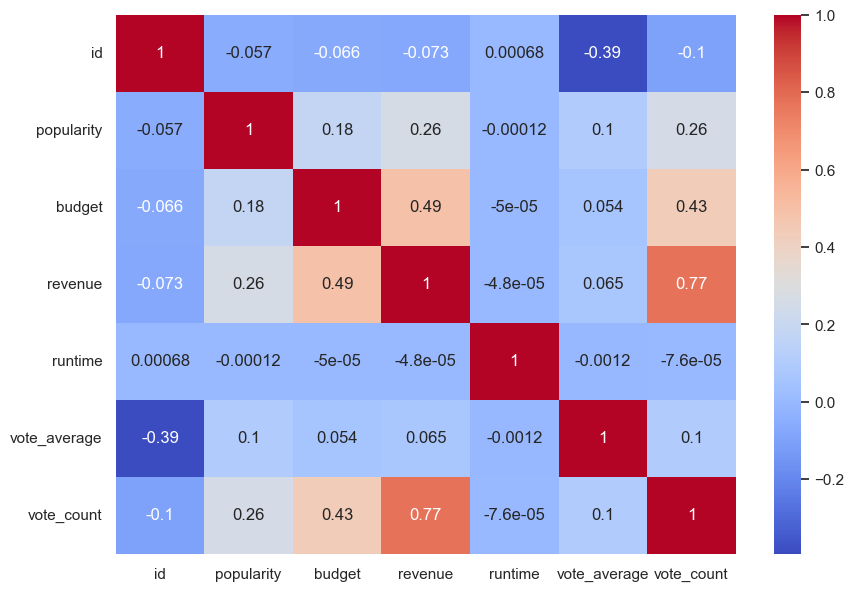

In [36]:
#Heatmap
sns.set(rc={"figure.figsize":(10,7)})
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [37]:
movies_data.shape

(722986, 20)

In [38]:
#id,title,overview,genres,keywords

In [39]:
movies = movies_data[['id','title','popularity','genres','production_companies','tagline','keywords','poster_path']]

In [40]:
movies.dropna(inplace=True)
movies.isnull().sum()
movies.duplicated().sum()
movies.drop_duplicates(inplace=True)
movies.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\2908781970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\2908781970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.drop_duplicates(inplace=True)


(49725, 8)

In [41]:
movies.head()

,id,title,popularity,genres,production_companies,tagline,keywords,poster_path
0,631842,Knock at the Cabin,3422.537,Horror-Mystery-Thriller,Blinding Edge Pictures-Universal Pictures-Film...,Save your family or save humanity. Make the ch...,based on novel or book-sacrifice-cabin-faith-e...,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg
1,646389,Plane,2618.646,Action-Adventure-Thriller,MadRiver Pictures-Di Bonaventura Pictures-G-BA...,Survive together or die alone.,pilot-airplane-philippines-held hostage-plane ...,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg
2,505642,Black Panther: Wakanda Forever,2525.408,Action-Adventure-Science Fiction,Marvel Studios,Forever.,loss of loved one-hero-sequel-superhero-based ...,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg
4,603692,John Wick: Chapter 4,2252.114,Action-Thriller-Crime,Thunder Road-87Eleven-Lionsgate-Summit Enterta...,No way back. One way out.,new york city-martial arts-hitman-sequel-organ...,/vZloFAK7NmvMGKE7VkF5UHaz0I.jpg
5,315162,Puss in Boots: The Last Wish,2078.280,Animation-Adventure-Comedy-Family,DreamWorks Animation-Universal Pictures,Say hola to his little friends.,fairy tale-talking dog-spin off-aftercreditsst...,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg


In [42]:
movies.drop(index=movies.tail(34000).index, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\1824534365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.drop(index=movies.tail(34000).index, inplace=True)


In [43]:
movies.shape

(15725, 8)

In [44]:
#converting popularity to rating

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(1, 5))
# movies['rating'] = scaler.fit_transform(movies[['popularity']])
# movies.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\153181873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['rating'] = scaler.fit_transform(movies[['popularity']])


,id,title,popularity,genres,production_companies,tagline,keywords,poster_path,rating
0,631842,Knock at the Cabin,3422.537,Horror-Mystery-Thriller,Blinding Edge Pictures-Universal Pictures-Film...,Save your family or save humanity. Make the ch...,based on novel or book-sacrifice-cabin-faith-e...,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,5.000000
1,646389,Plane,2618.646,Action-Adventure-Thriller,MadRiver Pictures-Di Bonaventura Pictures-G-BA...,Survive together or die alone.,pilot-airplane-philippines-held hostage-plane ...,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,4.058892
2,505642,Black Panther: Wakanda Forever,2525.408,Action-Adventure-Science Fiction,Marvel Studios,Forever.,loss of loved one-hero-sequel-superhero-based ...,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,3.949740
4,603692,John Wick: Chapter 4,2252.114,Action-Thriller-Crime,Thunder Road-87Eleven-Lionsgate-Summit Enterta...,No way back. One way out.,new york city-martial arts-hitman-sequel-organ...,/vZloFAK7NmvMGKE7VkF5UHaz0I.jpg,3.629797
5,315162,Puss in Boots: The Last Wish,2078.280,Animation-Adventure-Comedy-Family,DreamWorks Animation-Universal Pictures,Say hola to his little friends.,fairy tale-talking dog-spin off-aftercreditsst...,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,3.426291


In [ ]:
# pip install pickle

In [45]:
import pickle

pickle.dump(movies,open('artifacts/cleaned_movies.pkl','wb'))

In [46]:
def split_genres(genre_string):
    return genre_string.split("-")

# Apply the function to the genres column
movies['genres'] = movies['genres'].apply(split_genres)
movies['production_companies'] = movies['production_companies'].apply(split_genres)
movies['keywords'] = movies['keywords'].apply(split_genres)


C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\2075860557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].apply(split_genres)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\2075860557.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['production_companies'] = movies['production_companies'].apply(split_genres)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\2075860557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [47]:
# Define a function to split the tagline string into a list of words
def split_tagline(tagline_string):
    return tagline_string.split()

# Apply the function to the tagline column
movies['tagline'] = movies['tagline'].apply(split_tagline)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\1235512.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tagline'] = movies['tagline'].apply(split_tagline)


In [48]:
movies.head()

,id,title,popularity,genres,production_companies,tagline,keywords,poster_path,rating
0,631842,Knock at the Cabin,3422.537,"[Horror, Mystery, Thriller]","[Blinding Edge Pictures, Universal Pictures, F...","[Save, your, family, or, save, humanity., Make...","[based on novel or book, sacrifice, cabin, fai...",/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,5.000000
1,646389,Plane,2618.646,"[Action, Adventure, Thriller]","[MadRiver Pictures, Di Bonaventura Pictures, G...","[Survive, together, or, die, alone.]","[pilot, airplane, philippines, held hostage, p...",/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,4.058892
2,505642,Black Panther: Wakanda Forever,2525.408,"[Action, Adventure, Science Fiction]",[Marvel Studios],[Forever.],"[loss of loved one, hero, sequel, superhero, b...",/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,3.949740
4,603692,John Wick: Chapter 4,2252.114,"[Action, Thriller, Crime]","[Thunder Road, 87Eleven, Lionsgate, Summit Ent...","[No, way, back., One, way, out.]","[new york city, martial arts, hitman, sequel, ...",/vZloFAK7NmvMGKE7VkF5UHaz0I.jpg,3.629797
5,315162,Puss in Boots: The Last Wish,2078.280,"[Animation, Adventure, Comedy, Family]","[DreamWorks Animation, Universal Pictures]","[Say, hola, to, his, little, friends.]","[fairy tale, talking dog, spin off, aftercredi...",/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,3.426291


In [49]:
def remove_space(word):
    l=[]
    for i in word:
        l.append(i.replace(" ",""))
    return l

In [50]:
movies['genres'] = movies['genres'].apply(remove_space)
movies['production_companies'] = movies['production_companies'].apply(remove_space)
movies['keywords'] = movies['keywords'].apply(remove_space)
movies['tagline'] = movies['tagline'].apply(remove_space)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\3681893778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].apply(remove_space)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\3681893778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['production_companies'] = movies['production_companies'].apply(remove_space)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\3681893778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [51]:
movies.head()

,id,title,popularity,genres,production_companies,tagline,keywords,poster_path,rating
0,631842,Knock at the Cabin,3422.537,"[Horror, Mystery, Thriller]","[BlindingEdgePictures, UniversalPictures, Film...","[Save, your, family, or, save, humanity., Make...","[basedonnovelorbook, sacrifice, cabin, faith, ...",/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,5.000000
1,646389,Plane,2618.646,"[Action, Adventure, Thriller]","[MadRiverPictures, DiBonaventuraPictures, G, B...","[Survive, together, or, die, alone.]","[pilot, airplane, philippines, heldhostage, pl...",/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,4.058892
2,505642,Black Panther: Wakanda Forever,2525.408,"[Action, Adventure, ScienceFiction]",[MarvelStudios],[Forever.],"[lossoflovedone, hero, sequel, superhero, base...",/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,3.949740
4,603692,John Wick: Chapter 4,2252.114,"[Action, Thriller, Crime]","[ThunderRoad, 87Eleven, Lionsgate, SummitEnter...","[No, way, back., One, way, out.]","[newyorkcity, martialarts, hitman, sequel, org...",/vZloFAK7NmvMGKE7VkF5UHaz0I.jpg,3.629797
5,315162,Puss in Boots: The Last Wish,2078.280,"[Animation, Adventure, Comedy, Family]","[DreamWorksAnimation, UniversalPictures]","[Say, hola, to, his, little, friends.]","[fairytale, talkingdog, spinoff, aftercreditss...",/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,3.426291


Selecting the relevant features for recommendation

In [52]:
# selected_features = ['genres','production_companies','tagline','keywords']
# print(selected_features)

Combining all the 5 selected features

In [53]:
movies['tags'] = movies['genres']+movies['production_companies']+movies['tagline']+movies['keywords']
movies.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\2242962068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['genres']+movies['production_companies']+movies['tagline']+movies['keywords']


,id,title,popularity,genres,production_companies,tagline,keywords,poster_path,rating,tags
0,631842,Knock at the Cabin,3422.537,"[Horror, Mystery, Thriller]","[BlindingEdgePictures, UniversalPictures, Film...","[Save, your, family, or, save, humanity., Make...","[basedonnovelorbook, sacrifice, cabin, faith, ...",/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,5.000000,"[Horror, Mystery, Thriller, BlindingEdgePictur..."
1,646389,Plane,2618.646,"[Action, Adventure, Thriller]","[MadRiverPictures, DiBonaventuraPictures, G, B...","[Survive, together, or, die, alone.]","[pilot, airplane, philippines, heldhostage, pl...",/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,4.058892,"[Action, Adventure, Thriller, MadRiverPictures..."
2,505642,Black Panther: Wakanda Forever,2525.408,"[Action, Adventure, ScienceFiction]",[MarvelStudios],[Forever.],"[lossoflovedone, hero, sequel, superhero, base...",/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,3.949740,"[Action, Adventure, ScienceFiction, MarvelStud..."
4,603692,John Wick: Chapter 4,2252.114,"[Action, Thriller, Crime]","[ThunderRoad, 87Eleven, Lionsgate, SummitEnter...","[No, way, back., One, way, out.]","[newyorkcity, martialarts, hitman, sequel, org...",/vZloFAK7NmvMGKE7VkF5UHaz0I.jpg,3.629797,"[Action, Thriller, Crime, ThunderRoad, 87Eleve..."
5,315162,Puss in Boots: The Last Wish,2078.280,"[Animation, Adventure, Comedy, Family]","[DreamWorksAnimation, UniversalPictures]","[Say, hola, to, his, little, friends.]","[fairytale, talkingdog, spinoff, aftercreditss...",/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,3.426291,"[Animation, Adventure, Comedy, Family, DreamWo..."


In [54]:
movies.iloc[0]['tags']

['Horror',
 'Mystery',
 'Thriller',
 'BlindingEdgePictures',
 'UniversalPictures',
 'FilmNationEntertainment',
 'Wishmore',
 'PerfectWorldPictures',
 'Save',
 'your',
 'family',
 'or',
 'save',
 'humanity.',
 'Make',
 'the',
 'choice.',
 'basedonnovelorbook',
 'sacrifice',
 'cabin',
 'faith',
 'endoftheworld',
 'apocalypse',
 'homeinvasion',
 'lgbt',
 'aftercreditsstinger',
 'adoptedchild',
 'adopteddaughter',
 'shotonfilm',
 'gay',
 'samesexrelationship',
 'religioussymbolism']

In [55]:
new_df=movies[['id','title','tags','rating']]
new_df.head()

,id,title,tags,rating
0,631842,Knock at the Cabin,"[Horror, Mystery, Thriller, BlindingEdgePictur...",5.000000
1,646389,Plane,"[Action, Adventure, Thriller, MadRiverPictures...",4.058892
2,505642,Black Panther: Wakanda Forever,"[Action, Adventure, ScienceFiction, MarvelStud...",3.949740
4,603692,John Wick: Chapter 4,"[Action, Thriller, Crime, ThunderRoad, 87Eleve...",3.629797
5,315162,Puss in Boots: The Last Wish,"[Animation, Adventure, Comedy, Family, DreamWo...",3.426291


In [56]:
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))
new_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\3662197046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))


,id,title,tags,rating
0,631842,Knock at the Cabin,Horror Mystery Thriller BlindingEdgePictures U...,5.000000
1,646389,Plane,Action Adventure Thriller MadRiverPictures DiB...,4.058892
2,505642,Black Panther: Wakanda Forever,Action Adventure ScienceFiction MarvelStudios ...,3.949740
4,603692,John Wick: Chapter 4,Action Thriller Crime ThunderRoad 87Eleven Lio...,3.629797
5,315162,Puss in Boots: The Last Wish,Animation Adventure Comedy Family DreamWorksAn...,3.426291


In [57]:
new_df.iloc[0]['tags']

'Horror Mystery Thriller BlindingEdgePictures UniversalPictures FilmNationEntertainment Wishmore PerfectWorldPictures Save your family or save humanity. Make the choice. basedonnovelorbook sacrifice cabin faith endoftheworld apocalypse homeinvasion lgbt aftercreditsstinger adoptedchild adopteddaughter shotonfilm gay samesexrelationship religioussymbolism'

In [58]:
# Converting to lower case
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())
new_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\1783511216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


,id,title,tags,rating
0,631842,Knock at the Cabin,horror mystery thriller blindingedgepictures u...,5.000000
1,646389,Plane,action adventure thriller madriverpictures dib...,4.058892
2,505642,Black Panther: Wakanda Forever,action adventure sciencefiction marvelstudios ...,3.949740
4,603692,John Wick: Chapter 4,action thriller crime thunderroad 87eleven lio...,3.629797
5,315162,Puss in Boots: The Last Wish,animation adventure comedy family dreamworksan...,3.426291


In [59]:
new_df.shape

(15725, 4)

In [63]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import nltk
from nltk.stem import PorterStemmer 
ps=PorterStemmer()

In [65]:
def stems(text):
    l = []
    for i in text.split():
        l.append(ps.stem(i))
    
    return " ".join(l)

In [66]:
new_df['tags']=new_df['tags'].apply(stems)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\1522715013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stems)


In [67]:
new_df.iloc[0]['tags']

'horror mysteri thriller blindingedgepictur universalpictur filmnationentertain wishmor perfectworldpictur save your famili or save humanity. make the choice. basedonnovelorbook sacrific cabin faith endoftheworld apocalyps homeinvas lgbt aftercreditssting adoptedchild adopteddaught shotonfilm gay samesexrelationship religioussymbol'

In [73]:
new_df.head()

,id,title,tags,rating
0,631842,Knock at the Cabin,horror mysteri thriller blindingedgepictur uni...,5.000000
1,646389,Plane,action adventur thriller madriverpictur dibona...,4.058892
2,505642,Black Panther: Wakanda Forever,action adventur sciencefict marvelstudio forev...,3.949740
4,603692,John Wick: Chapter 4,action thriller crime thunderroad 87eleven lio...,3.629797
5,315162,Puss in Boots: The Last Wish,anim adventur comedi famili dreamworksanim uni...,3.426291


In [74]:
new_df['index_sak'] = range(len(new_df))
new_df.set_index('index_sak', inplace=True)
new_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5724\1182637651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['index_sak'] = range(len(new_df))


,id,title,tags,rating
index_sak,,,,
0,631842,Knock at the Cabin,horror mysteri thriller blindingedgepictur uni...,5.000000
1,646389,Plane,action adventur thriller madriverpictur dibona...,4.058892
2,505642,Black Panther: Wakanda Forever,action adventur sciencefict marvelstudio forev...,3.949740
3,603692,John Wick: Chapter 4,action thriller crime thunderroad 87eleven lio...,3.629797
4,315162,Puss in Boots: The Last Wish,anim adventur comedi famili dreamworksanim uni...,3.426291


In [75]:
import pickle
pickle.dump(new_df,open('artifacts/new_df.pkl','wb'))

Converting the text data to feature vectors

In [76]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(new_df['tags'])
print(feature_vectors)

  (0, 28447)	0.2667046951196344
  (0, 29696)	0.2667046951196344
  (0, 14177)	0.14898448515009652
  (0, 31061)	0.19516873992170547
  (0, 808)	0.2558581276282688
  (0, 807)	0.22646923053800802
  (0, 927)	0.1343207807552184
  (0, 19918)	0.14157747910563917
  (0, 16374)	0.18006704440256857
  (0, 1958)	0.17484235423481073
  (0, 11153)	0.18656607988150797
  (0, 12023)	0.16802375028261282
  (0, 5344)	0.18526089776350096
  (0, 29556)	0.18938457134021772
  (0, 3264)	0.0923904900926145
  (0, 6542)	0.20380322736239612
  (0, 34424)	0.05319964352659233
  (0, 21040)	0.13942669319728537
  (0, 16720)	0.2187734684304785
  (0, 24890)	0.13841285252441018
  (0, 12101)	0.0850632999288809
  (0, 38599)	0.10679784210999385
  (0, 29885)	0.29764174081577865
  (0, 25899)	0.19253537672405382
  (0, 38102)	0.23731579802937366
  :	:
  (15723, 10209)	0.1022712878728429
  (15723, 35089)	0.16326812994358697
  (15723, 723)	0.13990313009123256
  (15724, 30900)	0.3153970425171673
  (15724, 16947)	0.3251778189194927
  (157

Getting the similarity scores using cosine similarity

In [77]:
from sklearn.metrics.pairwise import cosine_similarity 
similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.03034701 0.         ... 0.00519711 0.         0.07992543]
 [0.03034701 1.         0.020213   ... 0.         0.0123359  0.00647719]
 [0.         0.020213   1.         ... 0.         0.01342155 0.        ]
 ...
 [0.00519711 0.         0.         ... 1.         0.02239548 0.        ]
 [0.         0.0123359  0.01342155 ... 0.02239548 1.         0.00635662]
 [0.07992543 0.00647719 0.         ... 0.         0.00635662 1.        ]]


In [78]:
similarity.shape

(15725, 15725)

In [79]:
import pickle
pickle.dump(similarity,open('artifacts/similarity_new.pkl','wb'))

In [80]:

new_df.head()

,id,title,tags,rating
index_sak,,,,
0,631842,Knock at the Cabin,horror mysteri thriller blindingedgepictur uni...,5.000000
1,646389,Plane,action adventur thriller madriverpictur dibona...,4.058892
2,505642,Black Panther: Wakanda Forever,action adventur sciencefict marvelstudio forev...,3.949740
3,603692,John Wick: Chapter 4,action thriller crime thunderroad 87eleven lio...,3.629797
4,315162,Puss in Boots: The Last Wish,anim adventur comedi famili dreamworksanim uni...,3.426291


Getting the movie name from the user

In [81]:
import pickle
movies = pickle.load(open('artifacts/new_df.pkl', 'rb'))
similarity = pickle.load(open('artifacts/similarity_new.pkl', 'rb'))

In [82]:
new_df.head()

,id,title,tags,rating
index_sak,,,,
0,631842,Knock at the Cabin,horror mysteri thriller blindingedgepictur uni...,5.000000
1,646389,Plane,action adventur thriller madriverpictur dibona...,4.058892
2,505642,Black Panther: Wakanda Forever,action adventur sciencefict marvelstudio forev...,3.949740
3,603692,John Wick: Chapter 4,action thriller crime thunderroad 87eleven lio...,3.629797
4,315162,Puss in Boots: The Last Wish,anim adventur comedi famili dreamworksanim uni...,3.426291


In [ ]:
movie_name = input(' Enter your favourite movie name : ')

In [ ]:
import difflib

def recommend(movie_name):
    list_of_all_titles = movies['title'].tolist()
    print(list_of_all_titles)
    find_close_match = difflib.get_close_matches(
        movie_name, list_of_all_titles)
    print(find_close_match)
    close_match = find_close_match[0]
    print(close_match)
    index_of_the_movie = movies[movies.title == close_match].index[0]
    print(index_of_the_movie)
    similarity_score = list(enumerate(similarity[index_of_the_movie]))
    print(similarity_score)
    sorted_similar_movies = sorted(
        similarity_score, key=lambda x: x[1], reverse=True)
    print(sorted_similar_movies)
    recommended_movie_names = []
    i = 1
    print('Movies suggested for you : \n')
    i = 1
    for movie in sorted_similar_movies:
        index = movie[0]
        title_from_index = movies[movies.index==index]['title'].values[0]
        if (i<30):
            print(i, '.',title_from_index)
        i+=1

In [ ]:
recommend(movie_name)

In [ ]:
import pickle

In [ ]:
pickle.dump(new_df,open('artifacts/new_df.pkl','wb'))


Creating a list with all the movie names given in the dataset

In [ ]:
list_of_all_titles = movies['title'].tolist()
print(list_of_all_titles)

Finding the close match for the movie name given by the user

In [ ]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

In [ ]:
close_match = find_close_match[0]
print(close_match)

Finding the index of the movie with title

In [ ]:
index_of_the_movie = movies[movies.title == close_match].index[0]
print(index_of_the_movie)

Getting a list of similar movies

In [ ]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

Sorting the movies based on their similarity score